<h2>Aikasarja-esimerkkejä</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<h3>Aikasarjan avaaminen ja valmistelu</h3>

Päivämäärät esiintyvät monenelaisissa formaateissa. Pandas-kirjaston <b>to_datetime()</b>-funktiolla yleisimmät päivämääräformaatit saa muunnettua pandas-kirjaston ymmärtämään formaattiin.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Aikaleimat täytyy sijoittaa dataframen indeksiin, jotta aikasarjatoiminnoista saa täyden hyödyn.

Aikasarja kannattaa yleensä järjestää vanhimmasta uusimpaan.

In [2]:
#Tiedostojen avaaminen:
elisa = pd.read_csv('elisa.csv', sep = ';', decimal = ',', 
                  usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
telia = pd.read_csv('telia.csv', sep = ';', decimal = ',', 
                  usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

#Aikaleimat indeksiin:
elisa.index = pd.to_datetime(elisa['Date'],dayfirst=True)
telia.index = pd.to_datetime(telia['Date'],dayfirst=True)

#Järjestän aikasarjan indeksin mukaan vanhimmasta uusimpaan:
elisa.sort_index(inplace = True)
telia.sort_index(inplace = True)

In [3]:
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2014-01-02,2.1.2014,19.20,19.21,19.26,19.40,19.10,19.20,19.223,235793,4532666.30,1190
2014-01-03,3.1.2014,19.34,19.35,19.12,19.52,19.12,19.35,19.350,306684,5934452.96,1394
2014-01-07,7.1.2014,19.35,19.36,19.46,19.56,19.31,19.36,19.407,390695,7582076.61,1558
2014-01-08,8.1.2014,19.24,19.29,19.34,19.47,19.21,19.29,19.293,318716,6149390.95,1138
2014-01-09,9.1.2014,19.49,19.50,19.35,19.56,19.29,19.50,19.450,357325,6950110.06,1412


In [4]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2014-01-02,2.1.2014,5.955,5.975,6.000,6.030,5.935,5.955,5.977,946163,5655321.115,994
2014-01-03,3.1.2014,5.965,5.975,5.940,6.000,5.940,5.975,5.982,778536,4657075.540,740
2014-01-07,7.1.2014,5.955,5.960,5.975,5.990,5.950,5.955,5.963,535438,3192607.365,631
2014-01-08,8.1.2014,5.890,5.895,5.960,5.960,5.880,5.895,5.919,861630,5101222.810,863
2014-01-09,9.1.2014,5.920,5.925,5.890,5.945,5.860,5.925,5.898,705308,4159965.545,808


<h3>Aikasarjan kuvaaminen</h3>

<b>plot()</b> piirtää viivakuvion.

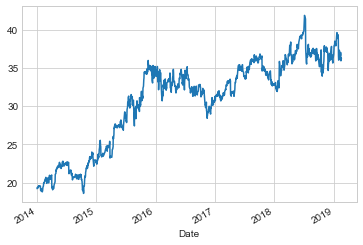

In [5]:
elisa['Closing price'].plot()

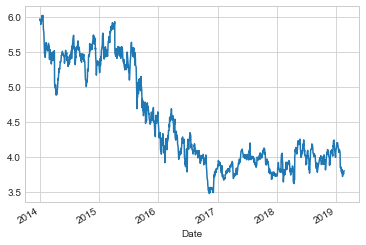

In [6]:
telia['Closing price'].plot()

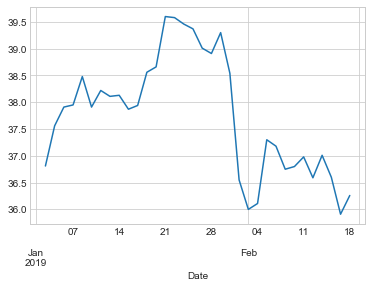

In [7]:
#Vuoden 2019 alusta:
elisa['Closing price']['2019-01':].plot()

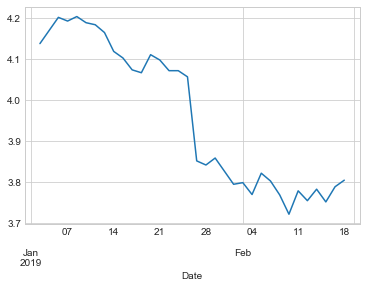

In [8]:
telia['Closing price']['2019-01':].plot()

<h3>Kaksi y-akselia</h3>

Jos haluan vertailla kuviossa kahta suuruusluokaltaan erilaista asiaa, niin käytän kahden y-akselin kuviota.

plot()-funktio on oikotie kuvion luontiin. Taustalla plot() kutsuu <b>subplots()</b>-funktiota. Tässä kutsun itse <b>subplots()</b>-funktiota. Funktio luo figure-olion ja axes-olion. Figure on "kehys", jonka sisälle voin sijoittaa yhden tai useampia axes-olioita.

Toista y-akselia varten luon toisen axes-olion twinx()-funktiolla. 

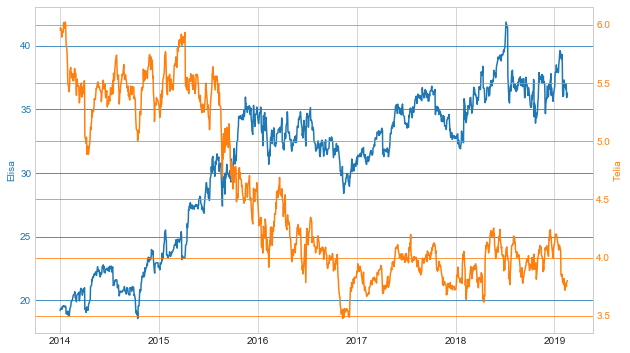

In [9]:
#Luon figure- ja axes-oliot
fig1, ax1 = plt.subplots(figsize = (10, 6))

#Määritän ax1-olion:
color = 'C0'
ax1.set_ylabel('Elisa', color=color)
ax1.plot(elisa['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

#Luon toisen axes-olion, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Telia', color=color)
ax2.plot(telia['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

[Text(1, 0, '0'),
 Text(1, 0, '10'),
 Text(1, 0, '20'),
 Text(1, 0, '30'),
 Text(1, 0, '40'),
 Text(1, 0, '50')]

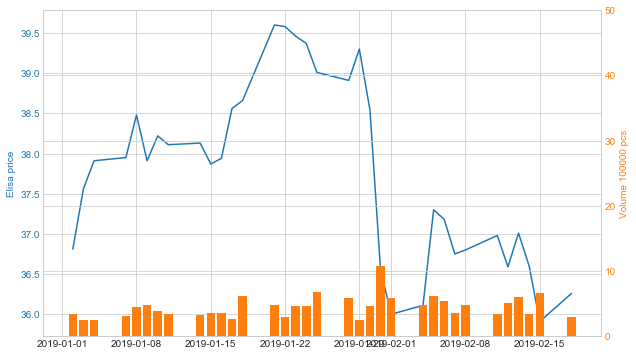

In [10]:
#Seuraavassa vielä hieman lisää vaikeusastetta:

fig2, ax3 = plt.subplots(figsize = (10, 6))

color = 'C0'
ax3.set_ylabel('Elisa price', color=color)
ax3.plot(elisa['2019-01':]['Closing price'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
color = 'C1'
ax4.set_ylabel('Volume 100000 pcs', color=color)
ax4.bar(elisa['2019-01':].index, elisa['2019-01':]['Total volume'], color=color)
ax4.set_ylim(0,5000000)
ax4.tick_params(axis='y', labelcolor=color)
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:.0f}'.format(y/100000) for y in vals])

<h3>Liukuva keskiarvo</h3>

Esimerkiksi 100 päivän liukuva keskiarvo on viimeisimmän 100 päivän keskiarvo. Liukuva keskiarvo tasoittaa aikasarjan satunnaista vaihtelua.

rolling()-funktiolla voin laskea liukuvia keskiarvoja haluamalleni aikajänteelle. Keskiarvon sijasta voin laskea myös muita tunnuslukuja liukuvasti.

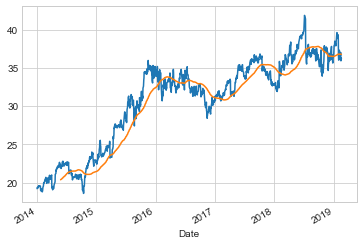

In [11]:
elisa['Closing price'].plot()

elisa['Closing price'].rolling(100).mean().plot()

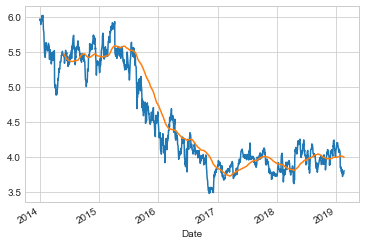

In [12]:
telia['Closing price'].plot()

telia['Closing price'].rolling(100).mean().plot()

<h3>Prosenttimuutokset</h3>

Aikasarjoissa siirrytään usein muuttujan arvojen tarkastelusta muutosprosenttien tarkasteluun.

Pandas-kirjaston pct_change()-funktio laskee prosenttimuutoksen.

In [13]:
elisa['Elisa_Change'] = elisa['Closing price'].pct_change()
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Elisa_Change
Date,,,,,,,,,,,,
2014-01-02,2.1.2014,19.20,19.21,19.26,19.40,19.10,19.20,19.223,235793,4532666.30,1190,NaN
2014-01-03,3.1.2014,19.34,19.35,19.12,19.52,19.12,19.35,19.350,306684,5934452.96,1394,0.007813
2014-01-07,7.1.2014,19.35,19.36,19.46,19.56,19.31,19.36,19.407,390695,7582076.61,1558,0.000517
2014-01-08,8.1.2014,19.24,19.29,19.34,19.47,19.21,19.29,19.293,318716,6149390.95,1138,-0.003616
2014-01-09,9.1.2014,19.49,19.50,19.35,19.56,19.29,19.50,19.450,357325,6950110.06,1412,0.010886


In [14]:
telia['Telia_Change'] = telia['Closing price'].pct_change()
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Telia_Change
Date,,,,,,,,,,,,
2014-01-02,2.1.2014,5.955,5.975,6.000,6.030,5.935,5.955,5.977,946163,5655321.115,994,NaN
2014-01-03,3.1.2014,5.965,5.975,5.940,6.000,5.940,5.975,5.982,778536,4657075.540,740,0.003359
2014-01-07,7.1.2014,5.955,5.960,5.975,5.990,5.950,5.955,5.963,535438,3192607.365,631,-0.003347
2014-01-08,8.1.2014,5.890,5.895,5.960,5.960,5.880,5.895,5.919,861630,5101222.810,863,-0.010076
2014-01-09,9.1.2014,5.920,5.925,5.890,5.945,5.860,5.925,5.898,705308,4159965.545,808,0.005089


<h3>Aikasarjojen yhdistäminen samaan dataframeen</h3>

#pandas-kirjaston <b>concat()</b>-funktio yhdistää useamman datan yhteen dataframeen. 

<b>axis</b>-parametri määrittää ydistetäänkö datat allekkain (oletus) vai vierekkäin (axis=1).

Yhdistettäessä aikasarjoja vierekkäin, concat() yhdistää samaan päivämäärään liittyvät tiedot samalle riville.

In [15]:
muutokset = pd.concat([elisa['Elisa_Change'], telia['Telia_Change']], axis=1)
muutokset.head()

,Elisa_Change,Telia_Change
Date,,
2014-01-02,NaN,NaN
2014-01-03,0.007813,0.003359
2014-01-07,0.000517,-0.003347
2014-01-08,-0.003616,-0.010076
2014-01-09,0.010886,0.005089


<h3>Muutosprosenttien tarkastelua</h3>

[Text(0, 0, '-6 %'),
 Text(0, 0, '-4 %'),
 Text(0, 0, '-2 %'),
 Text(0, 0, '0 %'),
 Text(0, 0, '2 %'),
 Text(0, 0, '4 %')]

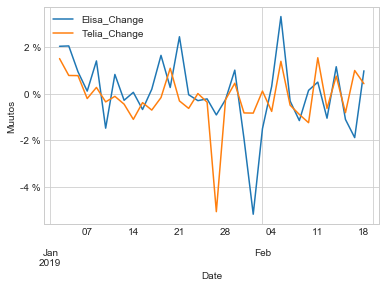

In [16]:
ax5 = muutokset['2019-01':].plot()

ax5.set_ylabel('Muutos')

vals = ax5.get_yticks()
ax5.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])

In [17]:
#Tunnuslukuja muutosprosenteille:
muutokset.describe()

,Elisa_Change,Telia_Change
count,1288.000000,1288.000000
mean,0.000593,-0.000262
std,0.014036,0.013090
min,-0.092226,-0.079728
25%,-0.006185,-0.006971
50%,0.000836,-0.000500
75%,0.007591,0.007057
max,0.065693,0.083107


In [18]:
#Elisan yli 5 % muutospäivät:
muutokset[(muutokset['Elisa_Change']<-0.05) | (muutokset['Elisa_Change']>0.05)]

,Elisa_Change,Telia_Change
Date,,
2014-04-03,-0.080515,-0.079307
2015-03-27,-0.075697,-0.012712
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


In [19]:
#Elisan ja Telian muutosprosentit korreloivat positiivisesti:
muutokset.corr()

,Elisa_Change,Telia_Change
Elisa_Change,1.000000,0.513875
Telia_Change,0.513875,1.000000


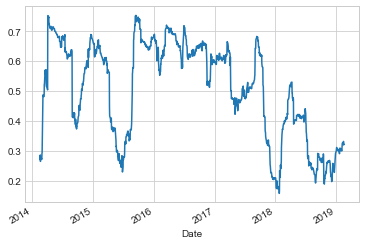

In [20]:
#Liukuva korrelaatio kertoo miten Elisan ja Telian muutosprosentit korreloivat eri aikoina:
korrelaatio=muutokset['Elisa_Change'].rolling(100, min_periods=30).corr(muutokset['Telia_Change'])
korrelaatio.plot()

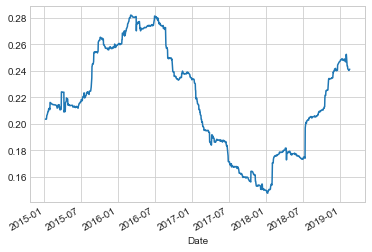

In [21]:
#Volatiliteetti kertoo osakkeeseen sisältyvästä riskistä.
(muutokset['Elisa_Change'].rolling(252).std()*(252**0.5)).plot()

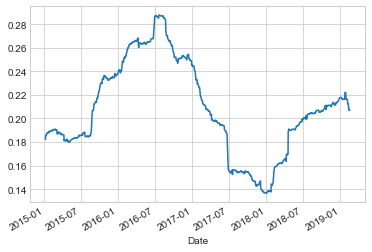

In [22]:
(muutokset['Telia_Change'].rolling(252).std()*(252**0.5)).plot()

<h3>Onko viikonpäivällä yhteyttä päivätuottoihin?</h3>

Indeksin päivämääristä pääsen viikonpäivään <b>weekday</b>-funktiolla.

In [23]:
#Viikonpäivät omaan sarakkeeseen (0=maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa_Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,256.0,0.001298,0.013213,-0.055172,-0.004599,0.000846,0.007368,0.057805
1,261.0,0.001037,0.012697,-0.036921,-0.007297,0.000959,0.007601,0.065693
2,262.0,0.000255,0.012842,-0.053899,-0.005679,-0.000139,0.006947,0.058061
3,256.0,0.000672,0.015262,-0.080515,-0.006281,0.001090,0.008242,0.057869
4,253.0,-0.000310,0.015971,-0.092226,-0.007023,0.000979,0.007463,0.061796


In [24]:
muutokset.groupby('Weekday')['Telia_Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,256.0,-0.000131,0.013908,-0.079728,-0.006654,-0.000943,0.007287,0.039216
1,261.0,0.000009,0.012185,-0.037550,-0.006621,-0.000855,0.006375,0.048600
2,262.0,0.000211,0.011552,-0.044934,-0.006209,-0.000243,0.007560,0.042407
3,256.0,-0.001295,0.013937,-0.079307,-0.008393,-0.000499,0.006641,0.039604
4,253.0,-0.000118,0.013786,-0.050542,-0.007194,0.000000,0.006829,0.083107
